In [17]:
from pdf_reader import PDFReader
from preprocessor import Preprocessor
from vectorizer import Vectorizer
from LabelPropModel import LabelPropModel
from visualizer import DocumentVisualizer
import os
import numpy as np

In [18]:
pdf_reader = PDFReader()
preprocessor = Preprocessor()
label_prop_model = LabelPropModel()
document_visualizer = DocumentVisualizer()

In [28]:
# Load Word2Vec model
vectorizer = Vectorizer("models/cbow_s1000.txt")

In [29]:
# Process labled data

X = []
y = []

# Loop through each PDF in the documents folder
for filename in os.listdir('documents/'):
  if filename.endswith('.pdf'):
    text = pdf_reader.extract_text(os.path.join('documents', filename))
    processed_text = preprocessor.process(text)
    vectorized_text = vectorizer.calculate_document_vector(processed_text)
    
    X.append(vectorized_text)
        
  if filename.startswith("risk"):
    label = 0  # Risk Report
  elif filename.startswith("privacy"):
    label = 1  # Privacy Policy
  elif filename.startswith("business"):
    label = 2 # Business Continuity Plan
  else:
    label = -1  # Unlabeled

  y.append(label)

X = np.array(X)
y = np.array(y)

label_prop_model.train(X, y)

In [30]:
# Analyze new data

new_X = []
doc_names = []
for filename in os.listdir('analyze/'):
  if filename.endswith('.pdf'):
    new_text = pdf_reader.extract_text(os.path.join('analyze', filename))
    new_processed_text = preprocessor.process(new_text)
    new_vectorized_text = vectorizer.calculate_document_vector(new_processed_text)
    
    new_X.append(new_vectorized_text)
    doc_names.append(filename)

new_X = np.array(new_X)

# Predicting labels for new data
predictions = label_prop_model.predict(new_X)

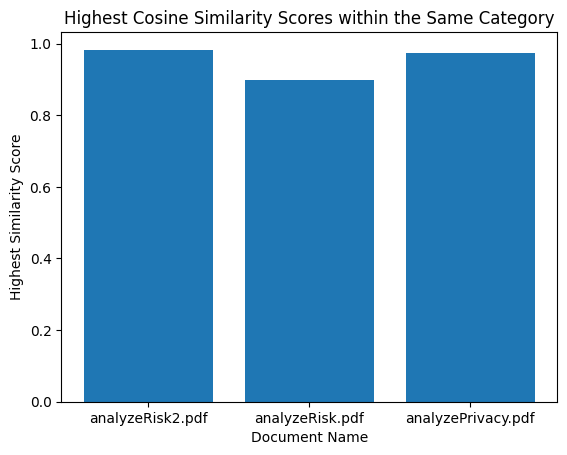

[0 0 1]

The highest similarity score of analyzeRisk2.pdf within its category is: 98.29.
The highest similarity score of analyzeRisk.pdf within its category is: 89.78.
The highest similarity score of analyzePrivacy.pdf within its category is: 97.50.

Done!


In [31]:
# Plot the analyzed data

# Calculate and plot the highest similarity scores
highest_scores = document_visualizer.calculate_similarity(new_X, X, y, predictions)
document_visualizer.plot_similarity(highest_scores, doc_names)

print(f"{predictions}\n")

# Print out the highest similarity scores for each document
document_visualizer.print_highest_scores(highest_scores, doc_names)

print("\nDone!")